In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Library to perform K Means
from sklearn.cluster import KMeans

#Library to perform train test split
from sklearn.model_selection import train_test_split

#Library to perform PCA
from sklearn.decomposition import PCA
from sklearn import preprocessing 
#Library to calculate accuracy
from sklearn.metrics import accuracy_score

#Library to calculate mode
from scipy.stats import mode

from sklearn.externals import joblib
#Classifier for predicting accuracy
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### **Question 1a**



In [3]:
#Read the Dataset
data_1 = pd.read_csv('/content/iris.data',delimiter = ",",header = None)
data_1.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width','Class']
print(data_1)

     sepal_length  sepal_width  petal_length  petal_width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
#Printing the Information about the Dataset
print(data_1.describe())
#Printing the DataTypes of each column of the Dataset
print("The Datatypes ")
print(data_1.dtypes)
#Printing the unique values of the Target
print(data_1['Class'].unique())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
The Datatypes 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Class            object
dtype: object
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
#Performing label encoding the classes of the Dataset
label_encoder = preprocessing.LabelEncoder() 
data_1['Class']= label_encoder.fit_transform(data_1['Class']) 
data_1['Class'].unique() 

array([0, 1, 2])

In [6]:
#Shuffling the Dataset
# data_1 = data_1.sample(frac = 1)  
# print(data_1)
#joblib.dump(data_1,'data_1_Q1')
data_1 = joblib.load('/content/data_1')
print(data_1)

     sepal_length  sepal_width  petal_length  petal_width  Class
126           6.2          2.8           4.8          1.8      2
27            5.2          3.5           1.5          0.2      0
117           7.7          3.8           6.7          2.2      2
114           5.8          2.8           5.1          2.4      2
56            6.3          3.3           4.7          1.6      1
..            ...          ...           ...          ...    ...
46            5.1          3.8           1.6          0.2      0
35            5.0          3.2           1.2          0.2      0
137           6.4          3.1           5.5          1.8      2
38            4.4          3.0           1.3          0.2      0
86            6.7          3.1           4.7          1.5      1

[150 rows x 5 columns]


In [7]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_1['Class']
print(data_y)
data_x = data_1.drop(["Class"],axis=1)
print(data_x)

126    2
27     0
117    2
114    2
56     1
      ..
46     0
35     0
137    2
38     0
86     1
Name: Class, Length: 150, dtype: int64
     sepal_length  sepal_width  petal_length  petal_width
126           6.2          2.8           4.8          1.8
27            5.2          3.5           1.5          0.2
117           7.7          3.8           6.7          2.2
114           5.8          2.8           5.1          2.4
56            6.3          3.3           4.7          1.6
..            ...          ...           ...          ...
46            5.1          3.8           1.6          0.2
35            5.0          3.2           1.2          0.2
137           6.4          3.1           5.5          1.8
38            4.4          3.0           1.3          0.2
86            6.7          3.1           4.7          1.5

[150 rows x 4 columns]


In [8]:
#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


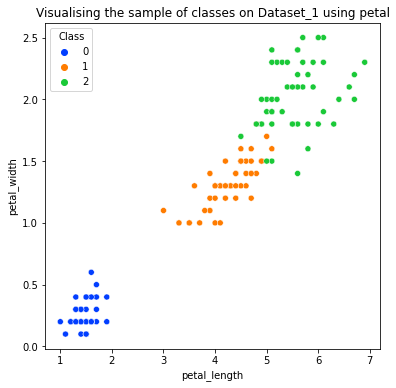

In [9]:
def Question1a_petal(data_frame):

  #Creating a figure of size 8*8
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="petal_length",y="petal_width",hue = "Class",legend='full',palette=palette)
  plt.title("Visualising the sample of classes on Dataset_1 using petal")
  plt.show()

Question1a_petal(data_1)

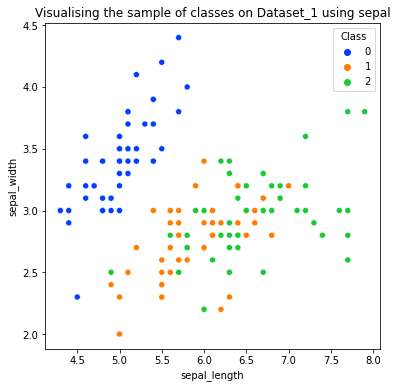

In [10]:
def Question1a_sepal(data_frame):

  #Creating a figure of size 8*8
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="sepal_length",y="sepal_width",hue = "Class",legend='full',palette=palette)
  plt.title("Visualising the sample of classes on Dataset_1 using sepal")
  plt.show()

Question1a_sepal(data_1)

### **Question 1b**

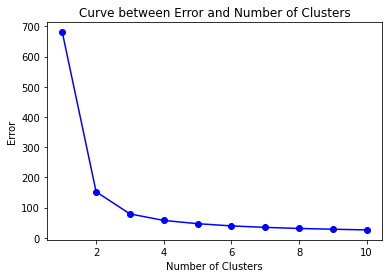

In [11]:
def Question1b(data_x):
  #Storing the WCSS error
  error = []
  #Iterating over 1 to 10 value of number of clusters
  for k in range(1,11):
    #using K Means
    km = KMeans(n_clusters=k, n_jobs = 4)
    #Fitting over data
    dx = km.fit(data_x)
    #Finding the WCSS
    error.append(km.inertia_)

  #Plotting the Graph
  plt.plot(range(1,11),error,marker='o',color='b')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Error')
  plt.title("Curve between Error and Number of Clusters")
  plt.show()

Question1b(data_x)

In [12]:
optimal_k = 3
print("The Optimal number of Clusters found is ", optimal_k)

The Optimal number of Clusters found is  3


### **Question1c**

<Figure size 432x432 with 0 Axes>

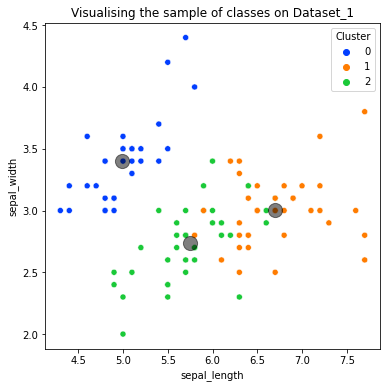

     sepal_length  sepal_width  petal_length  petal_width
64            5.6          2.9           3.6          1.3
111           6.4          2.7           5.3          1.9
141           6.9          3.1           5.1          2.3
109           7.2          3.6           6.1          2.5
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
146           6.3          2.5           5.0          1.9
128           6.4          2.8           5.6          2.1
77            6.7          3.0           5.0          1.7
116           6.5          3.0           5.5          1.8
101           5.8          2.7           5.1          1.9

[105 rows x 4 columns]


In [13]:
def Question1c_sepal(optimal_k,X_train,y_t):
  #Applying the K Means and plotting using the sepal attributes
  km_opt = KMeans(n_clusters = optimal_k)
  k = km_opt.fit(X_train)
  y_kmeans = km_opt.predict(X_train)
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  train_data = X_train.copy()
  #Plotting the scatterplot for each class using seaborn
  pcaDf = pd.DataFrame(data = train_data)
  pcaDf['Cluster'] = km_opt.labels_
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=pcaDf, x="sepal_length",y="sepal_width",hue = "Cluster",legend='full',palette=palette)
  centers = km_opt.cluster_centers_
  plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5); 
  plt.title("Visualising the sample of classes on Dataset_1")
  plt.show()
  print(X_train)

Question1c_sepal(optimal_k, X_train, y_train)

<Figure size 432x432 with 0 Axes>

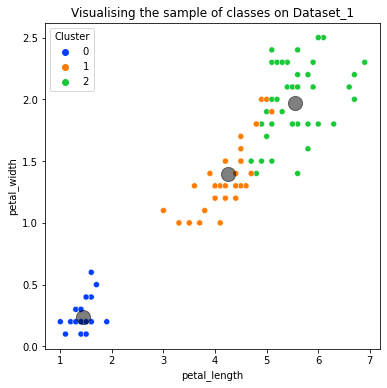

     sepal_length  sepal_width  petal_length  petal_width
64            5.6          2.9           3.6          1.3
111           6.4          2.7           5.3          1.9
141           6.9          3.1           5.1          2.3
109           7.2          3.6           6.1          2.5
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
146           6.3          2.5           5.0          1.9
128           6.4          2.8           5.6          2.1
77            6.7          3.0           5.0          1.7
116           6.5          3.0           5.5          1.8
101           5.8          2.7           5.1          1.9

[105 rows x 4 columns]


In [14]:
def Question1c_petal(optimal_k,X_train,y_t):
  #Applying the K Means and plotting using the petal attributes
  km_opt = KMeans(n_clusters = optimal_k)
  k = km_opt.fit(X_train)
  y_kmeans = km_opt.predict(X_train)
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  train_data = X_train.copy()
  #Plotting the scatterplot for each class using seaborn
  pcaDf = pd.DataFrame(data = train_data)
  pcaDf['Cluster'] = km_opt.labels_
  plt.figure(figsize=(6,6))
  palette = sns.color_palette("bright", 3) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=pcaDf, x="petal_length",y="petal_width",hue = "Cluster",legend='full',palette=palette)
  centers = km_opt.cluster_centers_
  plt.scatter(centers[:,2], centers[:, 3], c='black', s=200, alpha=0.5); 
  plt.title("Visualising the sample of classes on Dataset_1")
  plt.show()
  print(X_train)

Question1c_petal(optimal_k, X_train, y_train)

### **Question 1d**

In [18]:
def Question1d(X_train,y_train,X_test,y_test):
  #Fitting K means
  km_opt = KMeans(n_clusters = optimal_k)
  k = km_opt.fit(X_train)
  y_kmeans = km_opt.predict(X_train)
  y_kmeans1 = km_opt.predict(X_test)
  X_train = X_train.reset_index(drop = True)
  X_test = X_test.reset_index(drop = True)
  y_train = y_train.reset_index(drop = True)
  y_test = y_test.reset_index(drop = True)
  #Getting the labels
  labels = np.zeros_like(y_kmeans)
  num = [0]*3
  #predicting the classes from the clusters
  for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_train[mask])[0]
    num[i] = mode(y_train[mask])[0][0]
  print("The training accuracy is ",accuracy_score(y_train, labels))
  #predicting the classes for test data
  for i in range(X_test.shape[0]):
    for j in range(len(num)):
      if y_kmeans1[i] == j:
        y_kmeans1[i] = num[j]
  print("The validation accuracy is ",accuracy_score(y_test, y_kmeans1))

Question1d(X_train,y_train,X_test,y_test)

The training accuracy is  0.9142857142857143
The validation accuracy is  0.8


In [16]:
#Function to predict the accuaracy by a classifier since the k means not a good measure of accuracy
def Question1d_usingclassifier(X_train,y_train,X_test,y_test):
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)
  pred_train = log_reg.predict(X_train)
  pred_test = log_reg.predict(X_test)
  print("Accuracy by a classifier")
  print("The validation accuracy is ",accuracy_score(y_test, pred_test))
  print("The training accuracy is ",accuracy_score(y_train, pred_train))

Question1d_usingclassifier(X_train,y_train,X_test,y_test)

Accuracy by a classifier
The validation accuracy is  0.9777777777777777
The training accuracy is  0.9809523809523809
